In [ ]:
Sleep Health and Lifestyle Dataset.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0],inplace=True)
#fill null values

In [10]:
df.isnull().sum()


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
df.columns
df.shape

(374, 13)

In [12]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe(include='object')


,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,297


In [14]:
df.nunique()


Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [15]:
no_slp_disorder=df['Sleep Disorder'].value_counts().to_frame().reset_index()
no_slp_disorder

,Sleep Disorder,count
0,Sleep Apnea,297
1,Insomnia,77


In [16]:
new=df.groupby(['Age','Gender','Occupation','BMI Category','Daily Steps']).agg({'Sleep Duration':'mean','Stress Level':'mean','Heart Rate':'mean','Quality of Sleep':'mean','Physical Activity Level':'mean'}).reset_index()
new


,Age,Gender,Occupation,BMI Category,Daily Steps,Sleep Duration,Stress Level,Heart Rate,Quality of Sleep,Physical Activity Level
0,27,Male,Software Engineer,Overweight,4200,6.100000,6.0,77.0,6.0,42.0
1,28,Male,Doctor,Normal,10000,6.200000,8.0,75.0,6.0,60.0
2,28,Male,Sales Representative,Obese,3000,5.900000,8.0,85.0,4.0,30.0
3,28,Male,Software Engineer,Obese,3000,5.900000,8.0,85.0,4.0,30.0
4,29,Female,Nurse,Normal Weight,4000,6.500000,7.0,80.0,5.0,40.0
...,...,...,...,...,...,...,...,...,...,...
70,55,Female,Nurse,Overweight,5000,8.100000,4.0,72.0,9.0,75.0
71,56,Female,Doctor,Normal Weight,10000,8.200000,3.0,65.0,9.0,90.0
72,57,Female,Nurse,Overweight,7000,8.155556,3.0,68.0,9.0,75.0
73,58,Female,Nurse,Overweight,7000,8.000000,3.0,68.0,9.0,75.0


In [17]:
new['Age_category']=pd.cut(new['Age'],bins=[20,30,40,50,60],labels=['junior','senior','super senior','retirement'])
new

,Age,Gender,Occupation,BMI Category,Daily Steps,Sleep Duration,Stress Level,Heart Rate,Quality of Sleep,Physical Activity Level,Age_category
0,27,Male,Software Engineer,Overweight,4200,6.100000,6.0,77.0,6.0,42.0,junior
1,28,Male,Doctor,Normal,10000,6.200000,8.0,75.0,6.0,60.0,junior
2,28,Male,Sales Representative,Obese,3000,5.900000,8.0,85.0,4.0,30.0,junior
3,28,Male,Software Engineer,Obese,3000,5.900000,8.0,85.0,4.0,30.0,junior
4,29,Female,Nurse,Normal Weight,4000,6.500000,7.0,80.0,5.0,40.0,junior
...,...,...,...,...,...,...,...,...,...,...,...
70,55,Female,Nurse,Overweight,5000,8.100000,4.0,72.0,9.0,75.0,retirement
71,56,Female,Doctor,Normal Weight,10000,8.200000,3.0,65.0,9.0,90.0,retirement
72,57,Female,Nurse,Overweight,7000,8.155556,3.0,68.0,9.0,75.0,retirement
73,58,Female,Nurse,Overweight,7000,8.000000,3.0,68.0,9.0,75.0,retirement


In [18]:
count=new['Age_category'].value_counts().to_frame().reset_index()
count

,Age_category,count
0,senior,32
1,super senior,22
2,retirement,12
3,junior,9


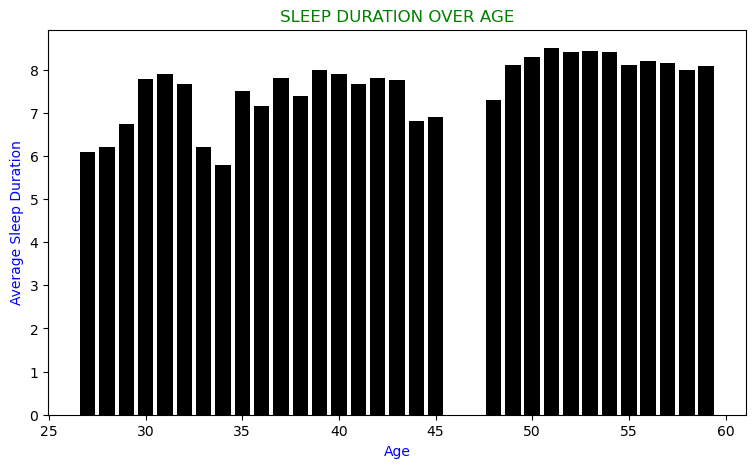

In [19]:
plt.figure(figsize=(9,5))
plt.title('SLEEP DURATION OVER AGE',color='g')
plt.xlabel('Age',color='b')
plt.ylabel('Average Sleep Duration',color='b')
plt.bar(new['Age'],new['Sleep Duration'],color='black')
plt.show()

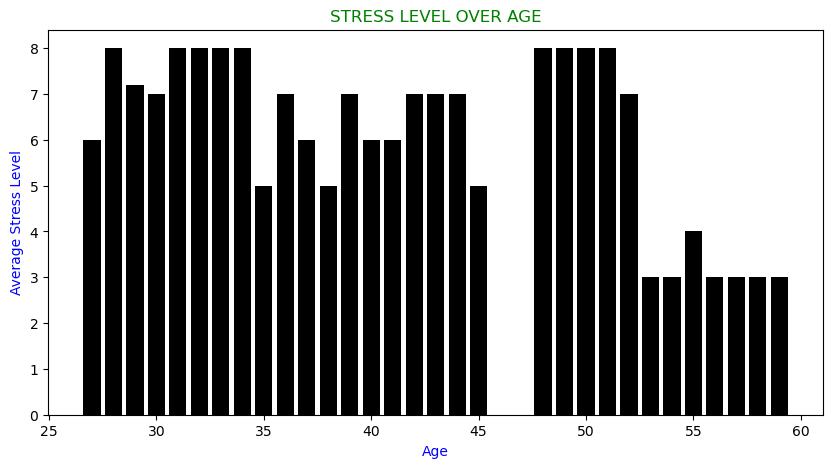

In [21]:
plt.figure(figsize=(10,5))
plt.title('STRESS LEVEL OVER AGE',color='g')
plt.bar(new['Age'],new['Stress Level'],color='black')
plt.xlabel('Age',color='b')
plt.ylabel('Average Stress Level',color='b')
plt.show()

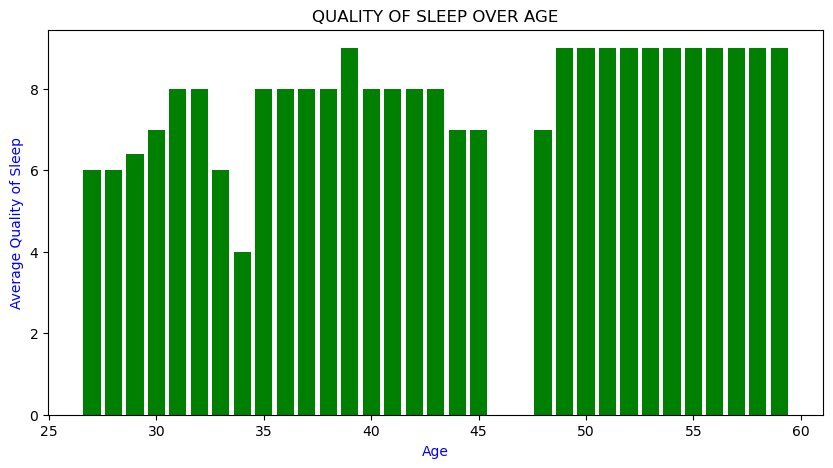

In [22]:
plt.figure(figsize=(10,5))
plt.title('QUALITY OF SLEEP OVER AGE')
plt.bar(new['Age'],new['Quality of Sleep'],color='g')
plt.xlabel('Age',color='b')
plt.ylabel('Average Quality of Sleep',color='b')
plt.show()

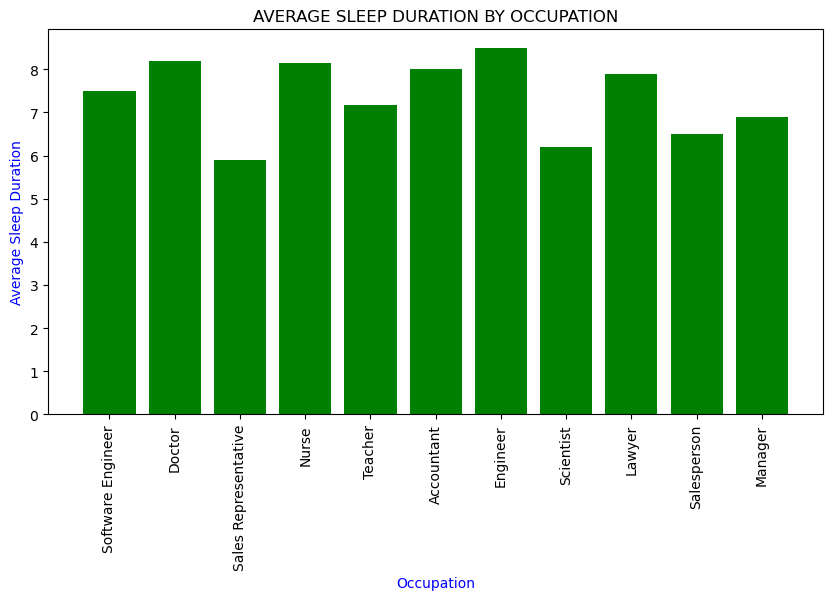

In [23]:
plt.figure(figsize=(10,5))
plt.title('AVERAGE SLEEP DURATION BY OCCUPATION')
plt.bar(new['Occupation'],new['Sleep Duration'],color='g')
plt.xlabel('Occupation',color='b')
plt.ylabel('Average Sleep Duration',color='b')
plt.xticks(rotation=90)
plt.show()

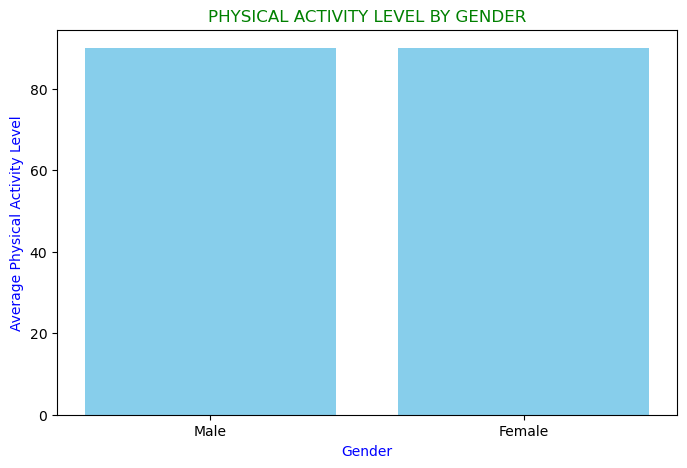

In [24]:
plt.figure(figsize=(8,5))
plt.title('PHYSICAL ACTIVITY LEVEL BY GENDER',color='g')
plt.bar(new['Gender'],new['Physical Activity Level'],color='skyblue')
plt.xlabel('Gender',color='b')
plt.ylabel('Average Physical Activity Level',color='b')
plt.show()

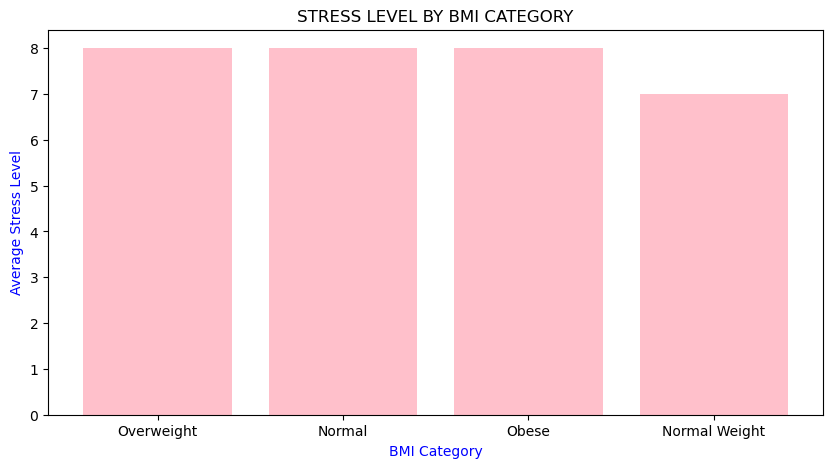

In [25]:
plt.figure(figsize=(10,5))
plt.title('STRESS LEVEL BY BMI CATEGORY')
plt.bar(new['BMI Category'],new['Stress Level'],color='pink')
plt.xlabel('BMI Category',color='b')
plt.ylabel('Average Stress Level',color='b')
plt.show()

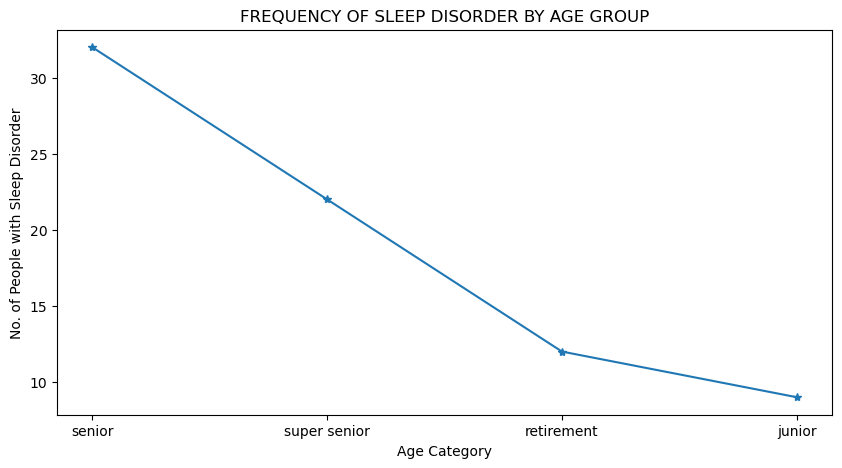

In [26]:
plt.figure(figsize=(10,5))
plt.title('FREQUENCY OF SLEEP DISORDER BY AGE GROUP')
plt.plot(count['Age_category'],count['count'],marker="*")
plt.xlabel('Age Category')
plt.ylabel('No. of People with Sleep Disorder')
plt.show()

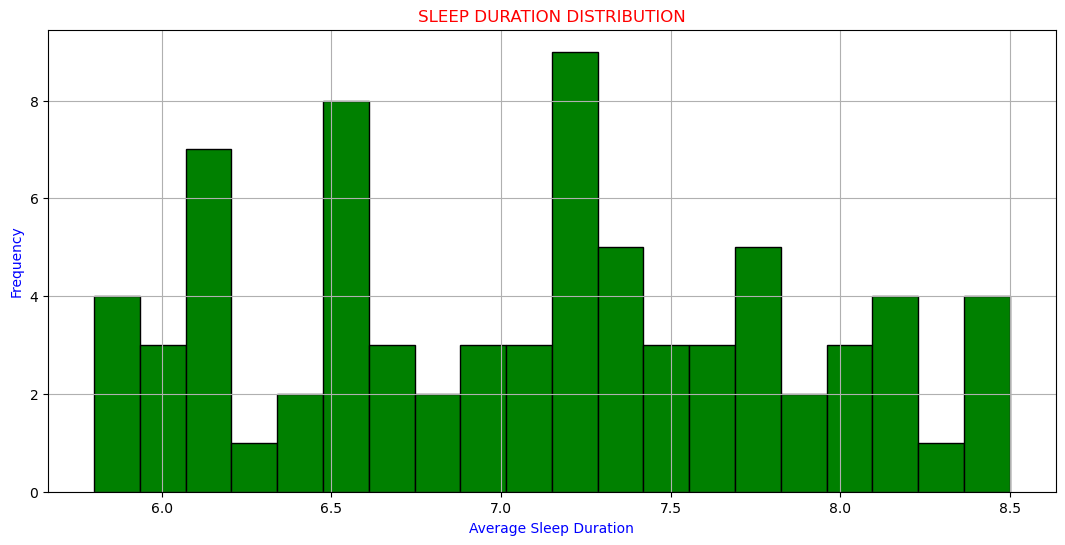

In [27]:
plt.figure(figsize=(13,6))
plt.title('SLEEP DURATION DISTRIBUTION',color='r')
plt.hist(new['Sleep Duration'],bins=20,color='g',edgecolor='black')
plt.xlabel('Average Sleep Duration',color='b')
plt.ylabel('Frequency',color='b')
plt.grid(True)
plt.show()

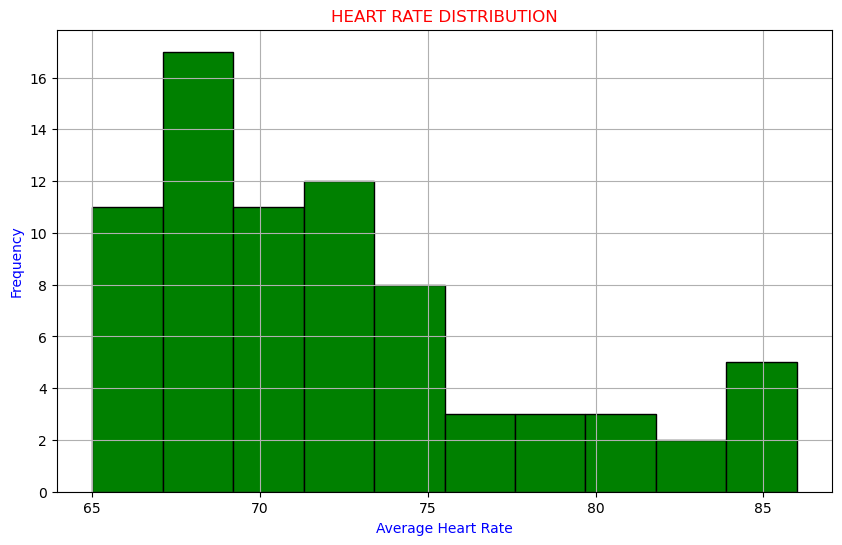

In [28]:
plt.figure(figsize=(10,6))
plt.title('HEART RATE DISTRIBUTION',color='r')
plt.hist(new['Heart Rate'],bins=10,color='g',edgecolor='black')
plt.xlabel('Average Heart Rate',color='b')
plt.ylabel('Frequency',color='b')
plt.grid(True)
plt.show()

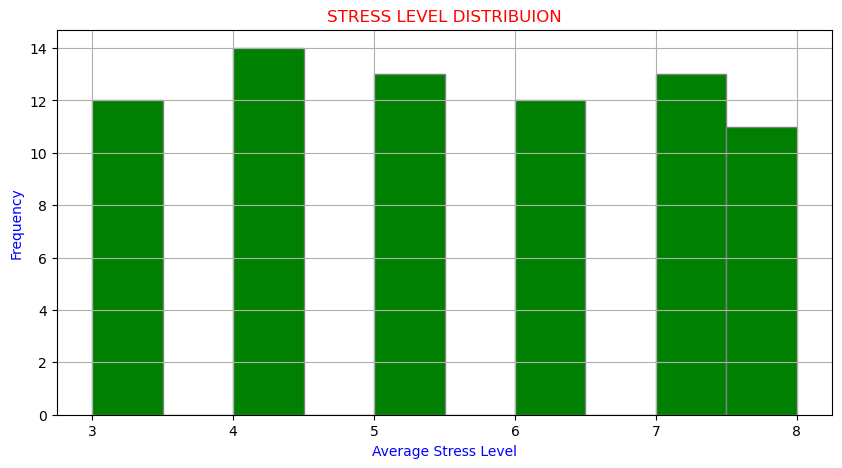

In [29]:
plt.figure(figsize=(10,5))
plt.title('STRESS LEVEL DISTRIBUION',color='r')
plt.hist(new['Stress Level'],bins=10,color='g',edgecolor='grey')
plt.xlabel('Average Stress Level',color='b')
plt.ylabel('Frequency',color='b')
plt.grid(True)
plt.show()

In [31]:
pd.set_option('display.max_rows', None)
new = df.groupby("Sleep Duration")["Occupation"].value_counts().reset_index()
new


,Sleep Duration,Occupation,count
0,5.8,Scientist,2
1,5.9,Sales Representative,2
2,5.9,Nurse,1
3,5.9,Software Engineer,1
4,6.0,Doctor,18
5,6.0,Nurse,13
6,6.1,Nurse,15
7,6.1,Doctor,9
8,6.1,Software Engineer,1
9,6.2,Doctor,6


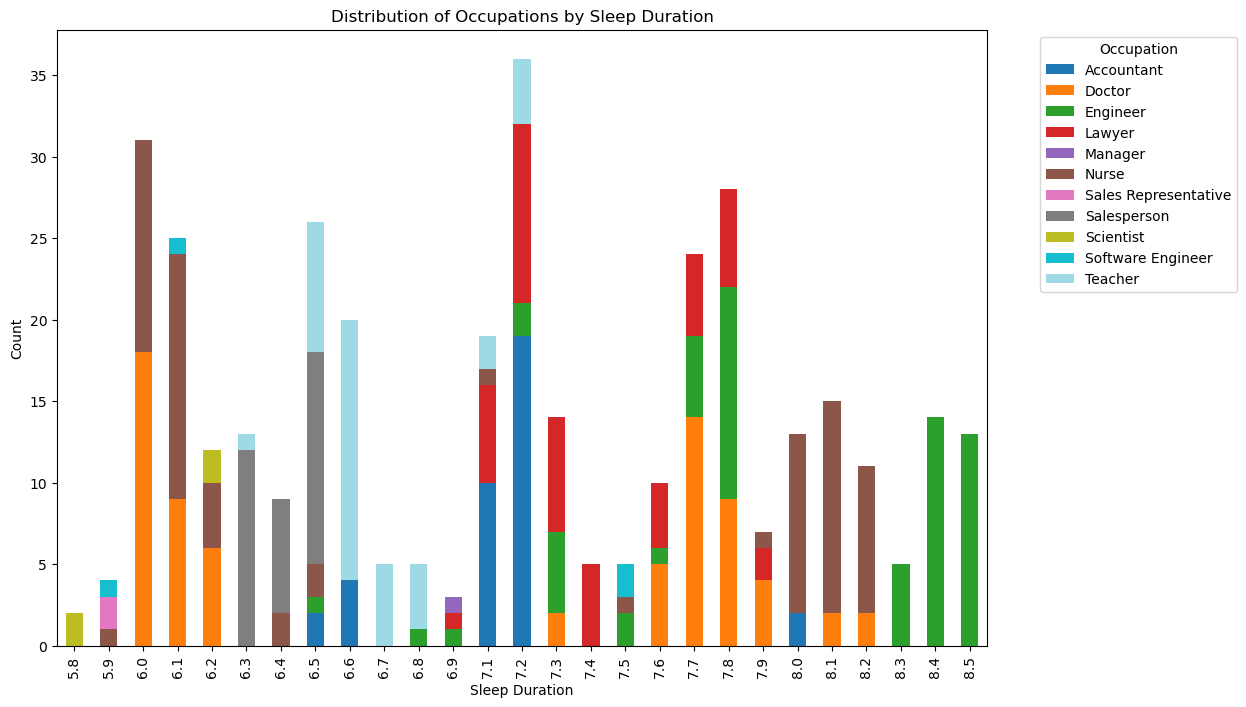

In [32]:
pivot_data = df.groupby(["Sleep Duration", "Occupation"]).size().unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribution of Occupations by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

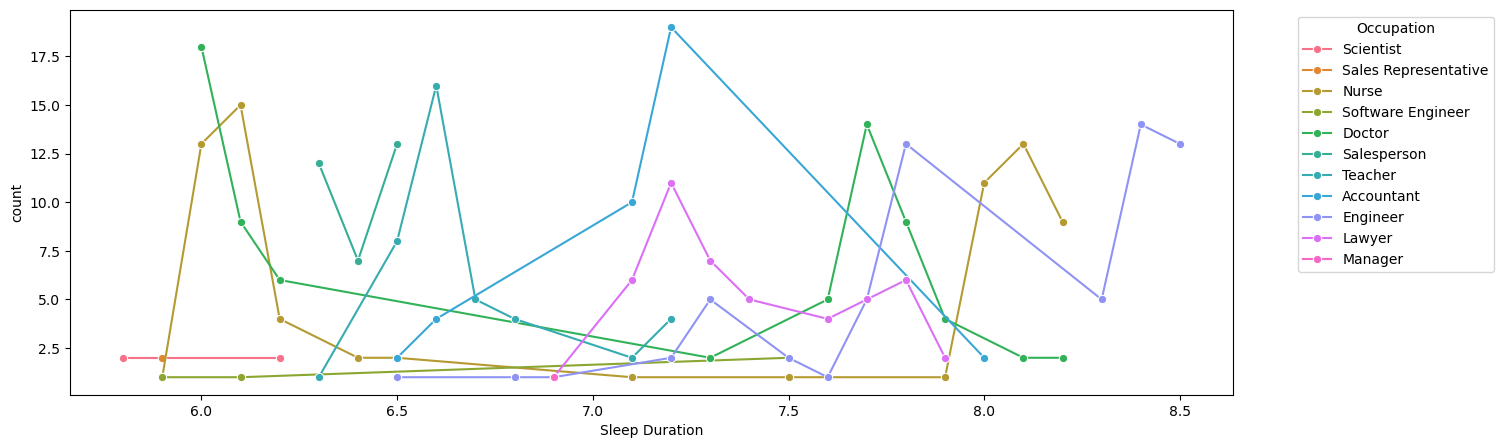

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=new, x="Sleep Duration", y="count", hue="Occupation", marker='o')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

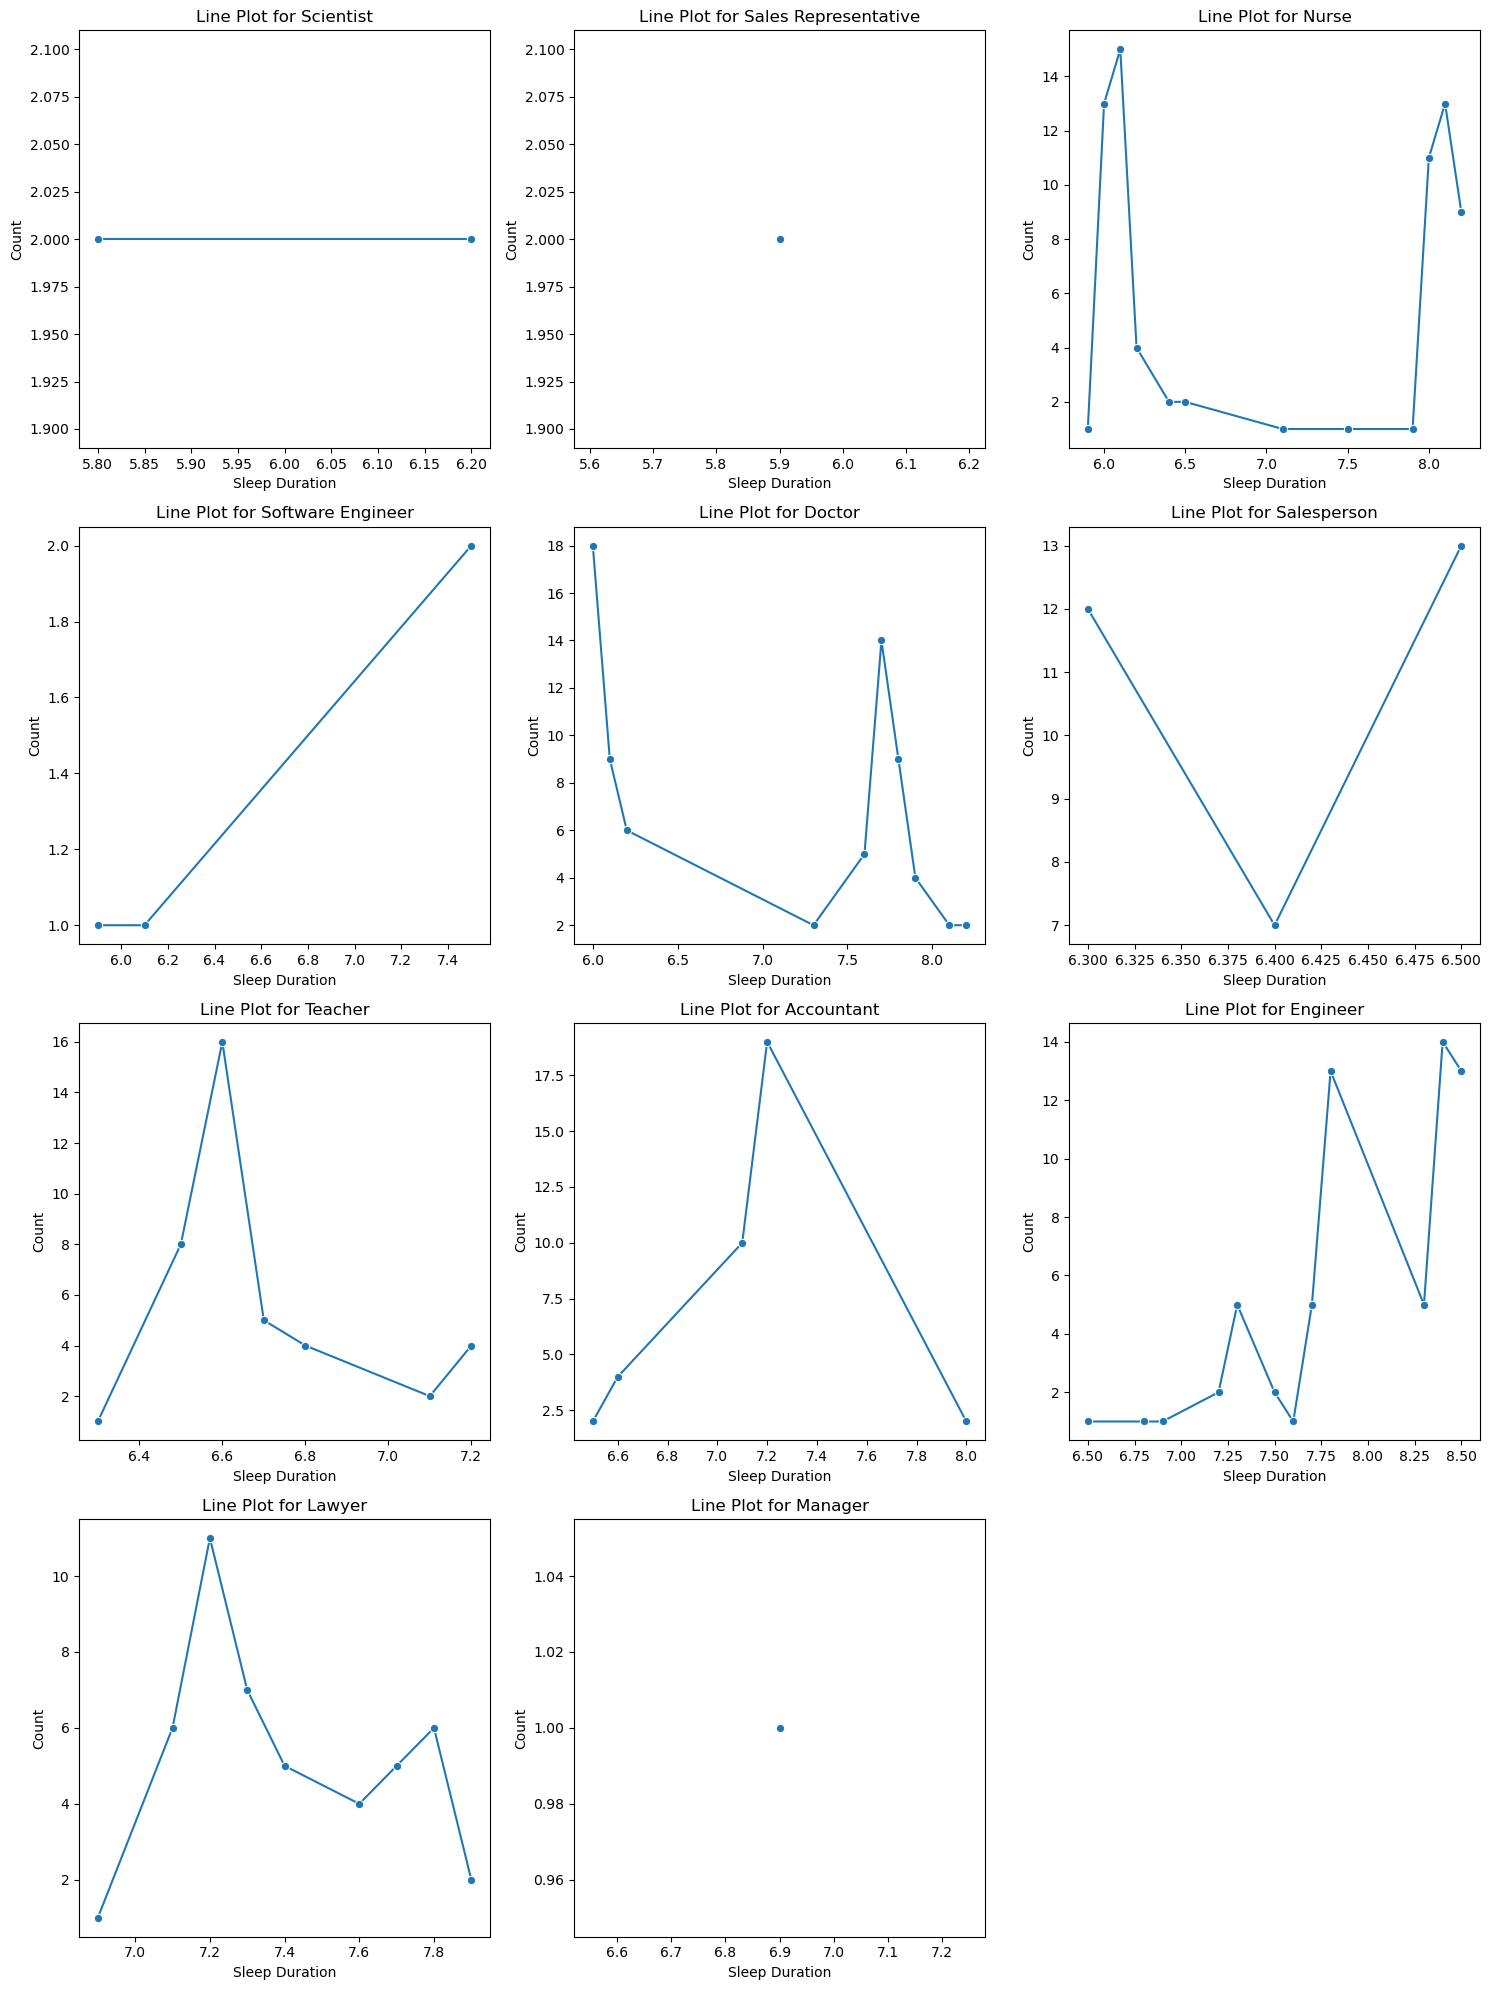

In [34]:
occupations = new['Occupation'].unique()
num_occupations = len(occupations)

num_cols = 3
num_rows = (num_occupations + num_cols - 1) // num_cols  # حساب عدد الصفوف

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # تحويل المحاور إلى مصفوفة أحادية الأبعاد


for ax, occupation in zip(axes, occupations):
    sns.lineplot(data=new[new['Occupation'] == occupation], x="Sleep Duration", y="count", marker='o', ax=ax)
    ax.set_title(f'Line Plot for {occupation}')
    ax.set_xlabel('Sleep Duration')
    ax.set_ylabel('Count')

# إخفاء المحاور غير المستخدمة
for ax in axes[num_occupations:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
CONCLUSION


our analysis of the dataset on sleep health and lifestyle
reveals significant insights into how various factors, such as age and daily habits,
influence sleep duration and quality. Prioritizing good sleep hygiene and making informed
lifestyle choices can lead to improved overall well-being. I encourage everyone to reflect on their own
sleep patterns and consider implementing some of the strategies discussed today to enhance their sleep quality.